Risk Development Percentage - MSE: 134.5390167696897, R-squared: 0.004343969556638183
Risk Dying Percentage - MSE: 22.86670568568044, R-squared: 0.05696528844933835
gender(0)- men 
gender(1)-female


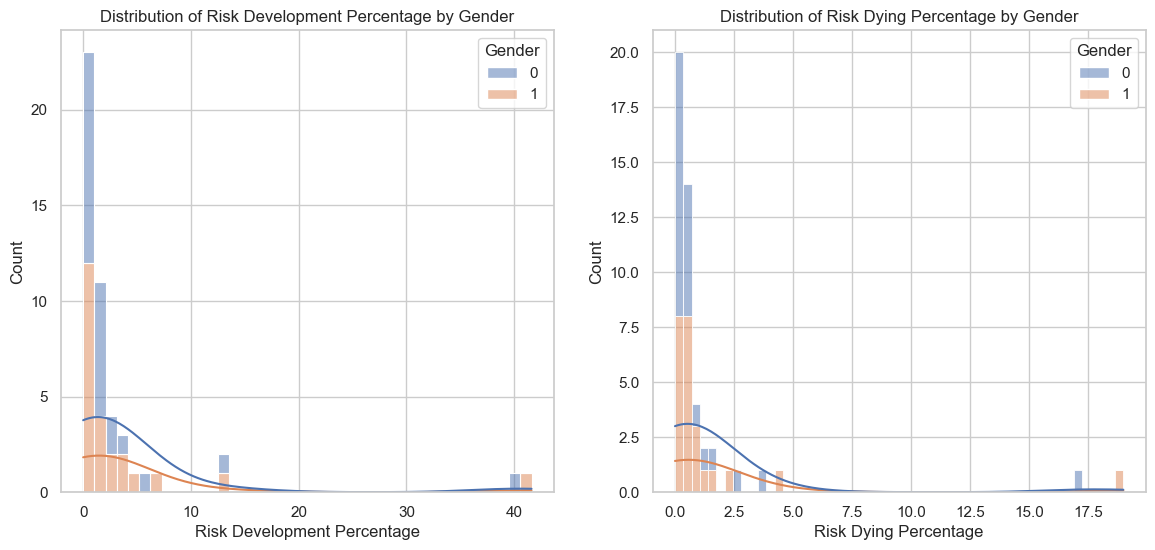

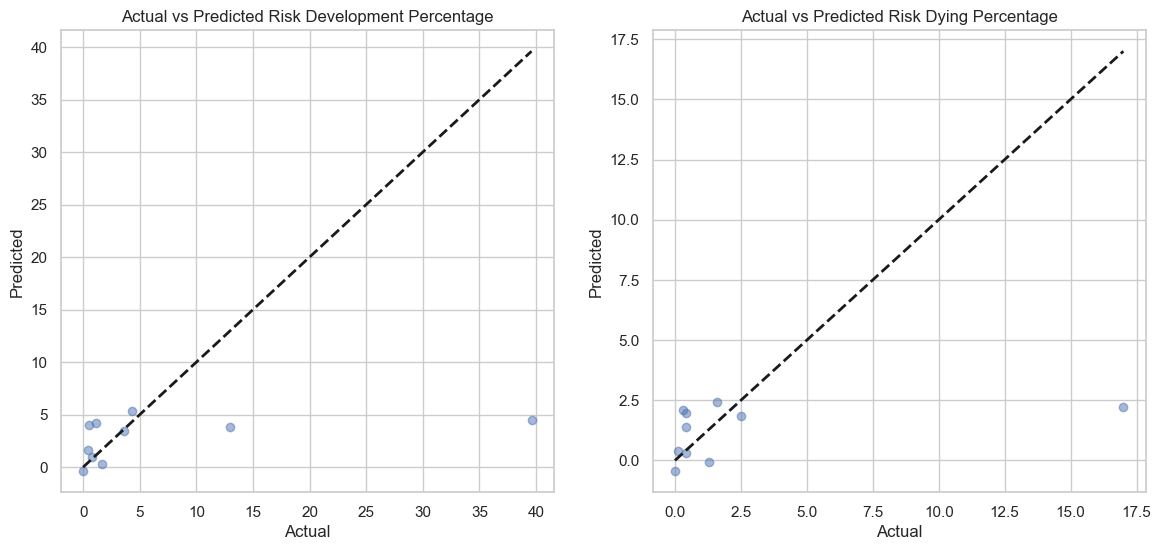

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Risk of Developing or Dying From Cancer.csv'
data = pd.read_csv(file_path)

# Fill missing values if there are any (the dataset appears clean)
data.fillna(0, inplace=True)

# Add a Gender column for modeling both male and female risks
data_male = data[['Cancer Type', 'Male Risk Development Percentage', 'Male Risk Dying Percentage']].copy()
data_male['Gender'] = 'Male'
data_male.columns = ['Cancer Type', 'Risk Development Percentage', 'Risk Dying Percentage', 'Gender']

data_female = data[['Cancer Type', 'Female Risk Development Percentage', 'Female Risk Dying Percentage']].copy()
data_female['Gender'] = 'Female'
data_female.columns = ['Cancer Type', 'Risk Development Percentage', 'Risk Dying Percentage', 'Gender']

# Combine male and female datasets
data_combined = pd.concat([data_male, data_female], axis=0)

# Encode 'Cancer Type' and 'Gender' as numerical values
le_cancer = LabelEncoder()
data_combined['Cancer Type'] = le_cancer.fit_transform(data_combined['Cancer Type'])

le_gender = LabelEncoder()
data_combined['Gender'] = le_gender.fit_transform(data_combined['Gender'])

# Define features (X) and target (y)
X = data_combined[['Cancer Type', 'Gender']]
y_development = data_combined['Risk Development Percentage']
y_dying = data_combined['Risk Dying Percentage']

# Split the data into training and testing sets for both targets
X_train_dev, X_test_dev, y_train_dev, y_test_dev = train_test_split(X, y_development, test_size=0.2, random_state=42)
X_train_die, X_test_die, y_train_die, y_test_die = train_test_split(X, y_dying, test_size=0.2, random_state=42)

# Initialize and train the model for Risk Development Percentage
model_dev = LinearRegression()
model_dev.fit(X_train_dev, y_train_dev)

# Initialize and train the model for Risk Dying Percentage
model_die = LinearRegression()
model_die.fit(X_train_die, y_train_die)

# Make predictions for Risk Development Percentage
y_pred_dev = model_dev.predict(X_test_dev)

# Evaluate the model for Risk Development Percentage
mse_dev = mean_squared_error(y_test_dev, y_pred_dev)
r2_dev = r2_score(y_test_dev, y_pred_dev)
print(f'Risk Development Percentage - MSE: {mse_dev}, R-squared: {r2_dev}')

# Make predictions for Risk Dying Percentage
y_pred_die = model_die.predict(X_test_die)

# Evaluate the model for Risk Dying Percentage
mse_die = mean_squared_error(y_test_die, y_pred_die)
r2_die = r2_score(y_test_die, y_pred_die)
print(f'Risk Dying Percentage - MSE: {mse_die}, R-squared: {r2_die}')

# Visualization

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of Risk Development Percentage
plt.figure(figsize=(14, 6))



plt.subplot(1, 2, 1)
sns.histplot(data=data_combined, x='Risk Development Percentage', hue='Gender', multiple="stack", kde=True)
plt.title('Distribution of Risk Development Percentage by Gender')

plt.subplot(1, 2, 2)
sns.histplot(data=data_combined, x='Risk Dying Percentage', hue='Gender', multiple="stack", kde=True)
plt.title('Distribution of Risk Dying Percentage by Gender')

plt.show()

# Visualize Predictions vs Actual Values for Risk Development Percentage
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_dev, y_pred_dev, alpha=0.5)
plt.plot([y_test_dev.min(), y_test_dev.max()], [y_test_dev.min(), y_test_dev.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Risk Development Percentage')

# Visualize Predictions vs Actual Values for Risk Dying Percentage
plt.subplot(1, 2, 2)
plt.scatter(y_test_die, y_pred_die, alpha=0.5)
plt.plot([y_test_die.min(), y_test_die.max()], [y_test_die.min(), y_test_die.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Risk Dying Percentage')

plt.show()
